In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pickle
import json
from io import StringIO
import csv
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

df = pd.read_csv("saveProgress.csv", encoding="utf-8")


/home/jacob/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,7,11,16,17,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


I want to see the relationship of between winning the votes and the proportion of the vote that a voter has. 
I'm thinking as a naive aproach I can plot y = proportion of votes won, x = weight of the vote. A potential pitfall of this is most votes are won by large measures so this may not be a good way of measuring. two approaches to solving this. 1. divide the weight of the vote by (1-percantage of vote won by victor) this will cause votes that were more controversial to be higher in value, but I have some questions on how this compares. The second and easier is to just slice the df to only contain proposals that were somewhat conroversial meaning the winner has less than say (arbitrarily) 80% of the vote. Another factor I may want to think about is removing proposals where there are less than say (also arbitrarily) 5 votes. 

Text(0, 0.5, 'propWon')

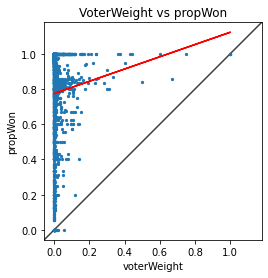

In [2]:

graphFrame = df[['voterWeight', 'propWon']].copy()
counts = graphFrame['voterWeight'].value_counts()
graphFrame = graphFrame[~graphFrame['voterWeight'].isin(counts[counts < 5].index)]
graphFrame = graphFrame[graphFrame['voterWeight'] >.00001]
#graphFrame = graphFrame[graphFrame['propWon'] <.999]

graphFrame = graphFrame.drop_duplicates()
graphFrame.head()
x = np.array(graphFrame['voterWeight']).reshape((-1, 1))
y = np.array(graphFrame['propWon'])
model = LinearRegression()
model.fit(x, y)
fig, ax = plt.subplots()
plt.plot(x, model.predict(x),color='red')
plt.scatter(x, y, s=5)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.title('VoterWeight vs propWon')
plt.xlabel('voterWeight')
plt.ylabel('propWon')

Looking at the chart above which removes proposals with fewer than five votes and ones where the voter had a weight of less than .0001 there's a clear upward trend (although I don't think a linear fit is appropriate here). The intercept is around 80% this means that most votes are decided by a large margin. I think it's reasonable to weight the vote by the controversy of the vote to better tell who's making more of a decision in the more *controversial* votes. by  dividing the weight by the complement of the winning vote we are bounding the multiplicative effect to be no greater than the number of choices in the vote. 

Text(0, 0.5, 'propWon')

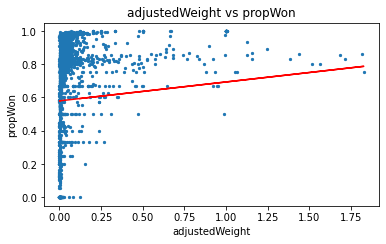

In [3]:

graphFrame = df[['adjustedWeght', 'propWon']].copy()
counts = graphFrame['adjustedWeght'].value_counts()
graphFrame = graphFrame[~graphFrame['adjustedWeght'].isin(counts[counts < 3].index)]
graphFrame = graphFrame[(graphFrame['adjustedWeght'] >.0001) & (graphFrame['adjustedWeght'] <2)]
#graphFrame = graphFrame[graphFrame['propWon'] <.999]

graphFrame = graphFrame.drop_duplicates()
graphFrame.head()
# scikit x = np.array(graphFrame['adjustedWeght']).reshape((-1, 1))
x = np.array(graphFrame['adjustedWeght'])

y = np.array(graphFrame['propWon'])
fit = np.polyfit(np.exp(x), y, 1)
fitpoly = np.poly1d(fit)

# scikit model = LinearRegression()
# scikit method model.fit((x), y)
fig, ax = plt.subplots()
# scikit model plt.plot(x, model.predict(x),color='red')
plt.scatter(x, y, s =5)
plt.plot(x,fitpoly(x), color='red')

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set(xlim=(0, 5), ylim=(0, .1),)
plt.autoscale()
plt.title('adjustedWeight vs propWon')
plt.xlabel('adjustedWeight')
plt.ylabel('propWon')
